# Distance distribution vs $r = \frac{p1}{p2}$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
import time
from tqdm import tqdm

from graph_generation import create_ER
from models import GCN, GCNEmbed
from train import Trainer
from embedding import Embedding

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

In [15]:
def experiment1(p1, p2, N, Num_grafi_per_tipo, learning_rate, epochs, batch_size, layers, num_neurons):
    # prima classe
    grafi_0 = create_ER(N, p1, Num_grafi_per_tipo)
    # seconda classe
    grafi_1 = create_ER(N, p2, Num_grafi_per_tipo)
    dataset_grafi_nx = grafi_0 + grafi_1
    #print(f"{len(dataset_grafi_nx)}")
    dataset_labels = np.array([0]*len(grafi_0) + [1]*len(grafi_1))
    
    model = GCN(hidden_channels=num_neurons)
    model.to(device)
    #print(model)
    
    trainer = Trainer(model, learning_rate=learning_rate, epochs=epochs, batch_size=batch_size, layers = layers, neurons=num_neurons)
    print("Loading Dataset...")
    trainer.load_dataset(dataset_grafi_nx, dataset_labels, percentage_train=percentage_train)
    train_loss_list, test_loss_list = trainer.launch_training()
    
    # get embedding of all graphs in dataset
    embed_model = GCNEmbed(model)
    embed_model = embed_model.to(device)
    whole_data = trainer.dataset.dataset_pyg
    all_data_loader = DataLoader(whole_data, batch_size=trainer.dataset.len_data, shuffle=False)
    batch = next(iter(all_data_loader))
    embeddings_array = embed_model(batch.x, batch.edge_index, batch.batch).cpu().detach().numpy()
    
    embeddings = Embedding(embeddings_array, trainer.dataset.labels, (p1,p2), test_loss_list)
    embeddings.calc_coppie()
    embeddings.calc_distances()
    
    return embeddings

#def experiment_neurons():

In [16]:
N = 100 # Graph nodes number
#valore minimo probabilità connessione
print(f"Prob minima: {round(np.log(N)/N, 3)}")
Num_grafi_per_tipo = 100 

# Model parameters
num_neurons = 250
layers = 3

# training parameters
learning_rate=0.002
epochs=2000
batch_size=150
percentage_train=0.7

#list_pER = [(0.02, 0.6), (0.05, 0.5), (0.1, 0.4), (0.15, 0.35), (0.2, 0.3), (0.23, 0.27), (0.245, 0.255), (0.25, 0.25)]
#list_pER = [(0.02, 0.6), (0.02, 0.5), (0.02, 0.4), (0.02, 0.35), (0.02, 0.3), (0.02, 0.27), (0.02, 0.255), (0.02, 0.25)]
#lista_p1 = [0.8] # [0.02, 0.04, 0.06, 0.08, 0.09]
#lista_p2 = [0.29, 0.31, 0.33, 0.35, 0.37, 0.38, 0.4]
lista_p1 = [0.3] # [0.02, 0.04, 0.06, 0.08, 0.09]
lista_p2 = [0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28]
#lista_p1 = np.array(lista_p1)/10
#lista_p2 = np.array(lista_p2)/10
ratios = [(el[1]/el[0], (el[1], el[0])) for el in itertools.product(lista_p1, lista_p2)]

p1 = 0.3
p2 = 0.08

Prob minima: 0.046


### Studio in funzione dei neuroni

In [17]:
list_embeddings = []
list_neurons = range(30, 250, 10)
for num_neurons in list_neurons:
    embeddings = experiment1(p1, p2, N, Num_grafi_per_tipo, 
                             learning_rate, epochs, batch_size, 
                             layers, num_neurons)
    list_embeddings.append(embeddings)

Mean connectivity for each node: 29.714
Mean connectivity for each node: 7.942
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 120.60it/s]


Tempo impiegato: 1.671475887298584
runs/lr-0.002_epochs2000_bs150_layers3_neurons30/02May_20-28-42
Mean connectivity for each node: 29.706
Mean connectivity for each node: 7.874
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 118.33it/s]


Tempo impiegato: 1.7024986743927002
runs/lr-0.002_epochs2000_bs150_layers3_neurons40/02May_20-29-46
Mean connectivity for each node: 29.672
Mean connectivity for each node: 7.941
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 132.11it/s]


Tempo impiegato: 1.5264198780059814
runs/lr-0.002_epochs2000_bs150_layers3_neurons50/02May_20-30-53
Mean connectivity for each node: 29.89
Mean connectivity for each node: 7.924
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 122.84it/s]


Tempo impiegato: 1.6429519653320312
runs/lr-0.002_epochs2000_bs150_layers3_neurons60/02May_20-32-03
Mean connectivity for each node: 29.746
Mean connectivity for each node: 7.969
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 130.28it/s]


Tempo impiegato: 1.5482251644134521
runs/lr-0.002_epochs2000_bs150_layers3_neurons70/02May_20-33-14
Mean connectivity for each node: 29.567
Mean connectivity for each node: 7.941
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 118.58it/s]


Tempo impiegato: 1.6987271308898926
runs/lr-0.002_epochs2000_bs150_layers3_neurons80/02May_20-34-25
Mean connectivity for each node: 29.689
Mean connectivity for each node: 7.886
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 119.13it/s]


Tempo impiegato: 1.6912798881530762
runs/lr-0.002_epochs2000_bs150_layers3_neurons90/02May_20-35-40
Mean connectivity for each node: 29.637
Mean connectivity for each node: 7.941
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 117.79it/s]


Tempo impiegato: 1.710386037826538
runs/lr-0.002_epochs2000_bs150_layers3_neurons100/02May_20-36-58
Mean connectivity for each node: 29.657
Mean connectivity for each node: 7.852
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 117.58it/s]


Tempo impiegato: 1.7143537998199463
runs/lr-0.002_epochs2000_bs150_layers3_neurons110/02May_20-38-18
Mean connectivity for each node: 29.721
Mean connectivity for each node: 7.972
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 116.31it/s]


Tempo impiegato: 1.7318644523620605
runs/lr-0.002_epochs2000_bs150_layers3_neurons120/02May_20-39-41
Early stopping!!!
Mean connectivity for each node: 29.753
Mean connectivity for each node: 7.917
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 130.12it/s]


Tempo impiegato: 1.549619436264038
runs/lr-0.002_epochs2000_bs150_layers3_neurons130/02May_20-41-06
Early stopping!!!
Mean connectivity for each node: 29.553
Mean connectivity for each node: 7.913
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 130.86it/s]


Tempo impiegato: 1.541834831237793
runs/lr-0.002_epochs2000_bs150_layers3_neurons140/02May_20-42-33
Early stopping!!!
Mean connectivity for each node: 29.738
Mean connectivity for each node: 7.909
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 115.37it/s]


Tempo impiegato: 1.7463631629943848
runs/lr-0.002_epochs2000_bs150_layers3_neurons150/02May_20-44-02
Mean connectivity for each node: 29.632
Mean connectivity for each node: 7.889
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 115.87it/s]


Tempo impiegato: 1.738760232925415
runs/lr-0.002_epochs2000_bs150_layers3_neurons160/02May_20-45-37
Mean connectivity for each node: 29.65
Mean connectivity for each node: 7.898
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 114.04it/s]


Tempo impiegato: 1.7716665267944336
runs/lr-0.002_epochs2000_bs150_layers3_neurons170/02May_20-47-14
Early stopping!!!
Mean connectivity for each node: 29.678
Mean connectivity for each node: 7.965
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 116.22it/s]


Tempo impiegato: 1.7333135604858398
runs/lr-0.002_epochs2000_bs150_layers3_neurons180/02May_20-48-51
Mean connectivity for each node: 29.798
Mean connectivity for each node: 7.986
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 130.32it/s]


Tempo impiegato: 1.547595739364624
runs/lr-0.002_epochs2000_bs150_layers3_neurons190/02May_20-50-34
Mean connectivity for each node: 29.731
Mean connectivity for each node: 7.934
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 130.17it/s]


Tempo impiegato: 1.5486547946929932
runs/lr-0.002_epochs2000_bs150_layers3_neurons200/02May_20-52-20
Early stopping!!!
Mean connectivity for each node: 29.647
Mean connectivity for each node: 7.893
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 115.50it/s]


Tempo impiegato: 1.743941307067871
runs/lr-0.002_epochs2000_bs150_layers3_neurons210/02May_20-54-04
Mean connectivity for each node: 29.638
Mean connectivity for each node: 7.924
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 115.34it/s]


Tempo impiegato: 1.7463750839233398
runs/lr-0.002_epochs2000_bs150_layers3_neurons220/02May_20-55-55
Early stopping!!!
Mean connectivity for each node: 29.535
Mean connectivity for each node: 7.892
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 114.29it/s]


Tempo impiegato: 1.7626636028289795
runs/lr-0.002_epochs2000_bs150_layers3_neurons230/02May_20-57-46
Mean connectivity for each node: 29.655
Mean connectivity for each node: 7.91
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 114.42it/s]


Tempo impiegato: 1.7599287033081055
runs/lr-0.002_epochs2000_bs150_layers3_neurons240/02May_20-59-43
Early stopping!!!


In [ ]:
#em = list_embeddings[0]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,2)) #sharex=True)
n,b,_ = ax1.hist(embeddings.inter_dists, bins=80, label=f"Inter-cluster distance")
ax2.plot(embeddings.test_loss_list)

### Studio in funzione delle probabilità

In [12]:
list_embeddings = []

#starting_epochs = epochs
for p1,p2 in np.array(ratios)[:,1]:
    embeddings = experiment1(p1, p2, N, Num_grafi_per_tipo, 
                             learning_rate, epochs, batch_size, 
                             layers, num_neurons)
    list_embeddings.append(embeddings)
    
    #epochs += 100
    
#epochs = starting_epochs

/tmp/ipykernel_1803268/4053242924.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for p1,p2 in np.array(ratios)[:,1]:


Mean connectivity for each node: 3.985
Mean connectivity for each node: 29.675
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 134.93it/s]


Tempo impiegato: 1.4952516555786133
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-31-57
Early stopping!!!
Mean connectivity for each node: 5.893
Mean connectivity for each node: 29.591
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 126.99it/s]


Tempo impiegato: 1.5876555442810059
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-33-46
Early stopping!!!
Mean connectivity for each node: 7.937
Mean connectivity for each node: 29.73
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 122.36it/s]


Tempo impiegato: 1.647355318069458
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-35-37
Early stopping!!!
Mean connectivity for each node: 9.94
Mean connectivity for each node: 29.643
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 116.10it/s]


Tempo impiegato: 1.735680103302002
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-37-36
Early stopping!!!
Mean connectivity for each node: 11.82
Mean connectivity for each node: 29.632
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 111.77it/s]


Tempo impiegato: 1.8020987510681152
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-39-40
Mean connectivity for each node: 13.884
Mean connectivity for each node: 29.719
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 105.59it/s]


Tempo impiegato: 1.9071612358093262
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-41-48
Mean connectivity for each node: 15.905
Mean connectivity for each node: 29.65
Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 101.78it/s]


Tempo impiegato: 1.9786145687103271
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-44-01
Mean connectivity for each node: 17.867
Mean connectivity for each node: 29.637
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 97.98it/s]


Tempo impiegato: 2.054267168045044
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-46-16
Mean connectivity for each node: 19.81
Mean connectivity for each node: 29.743
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 94.12it/s]


Tempo impiegato: 2.137774705886841
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-48-37
Mean connectivity for each node: 21.832
Mean connectivity for each node: 29.565
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 92.22it/s]


Tempo impiegato: 2.1818184852600098
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-51-01
Mean connectivity for each node: 23.85
Mean connectivity for each node: 29.761
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 88.85it/s]


Tempo impiegato: 2.2644622325897217
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-53-29
Mean connectivity for each node: 25.771
Mean connectivity for each node: 29.69
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 85.67it/s]


Tempo impiegato: 2.348020315170288
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-56-01
Mean connectivity for each node: 27.768
Mean connectivity for each node: 29.704
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 82.20it/s]


Tempo impiegato: 2.446665048599243
runs/lr-0.002_epochs2000_bs150_layers3_neurons250/02May_19-58-36


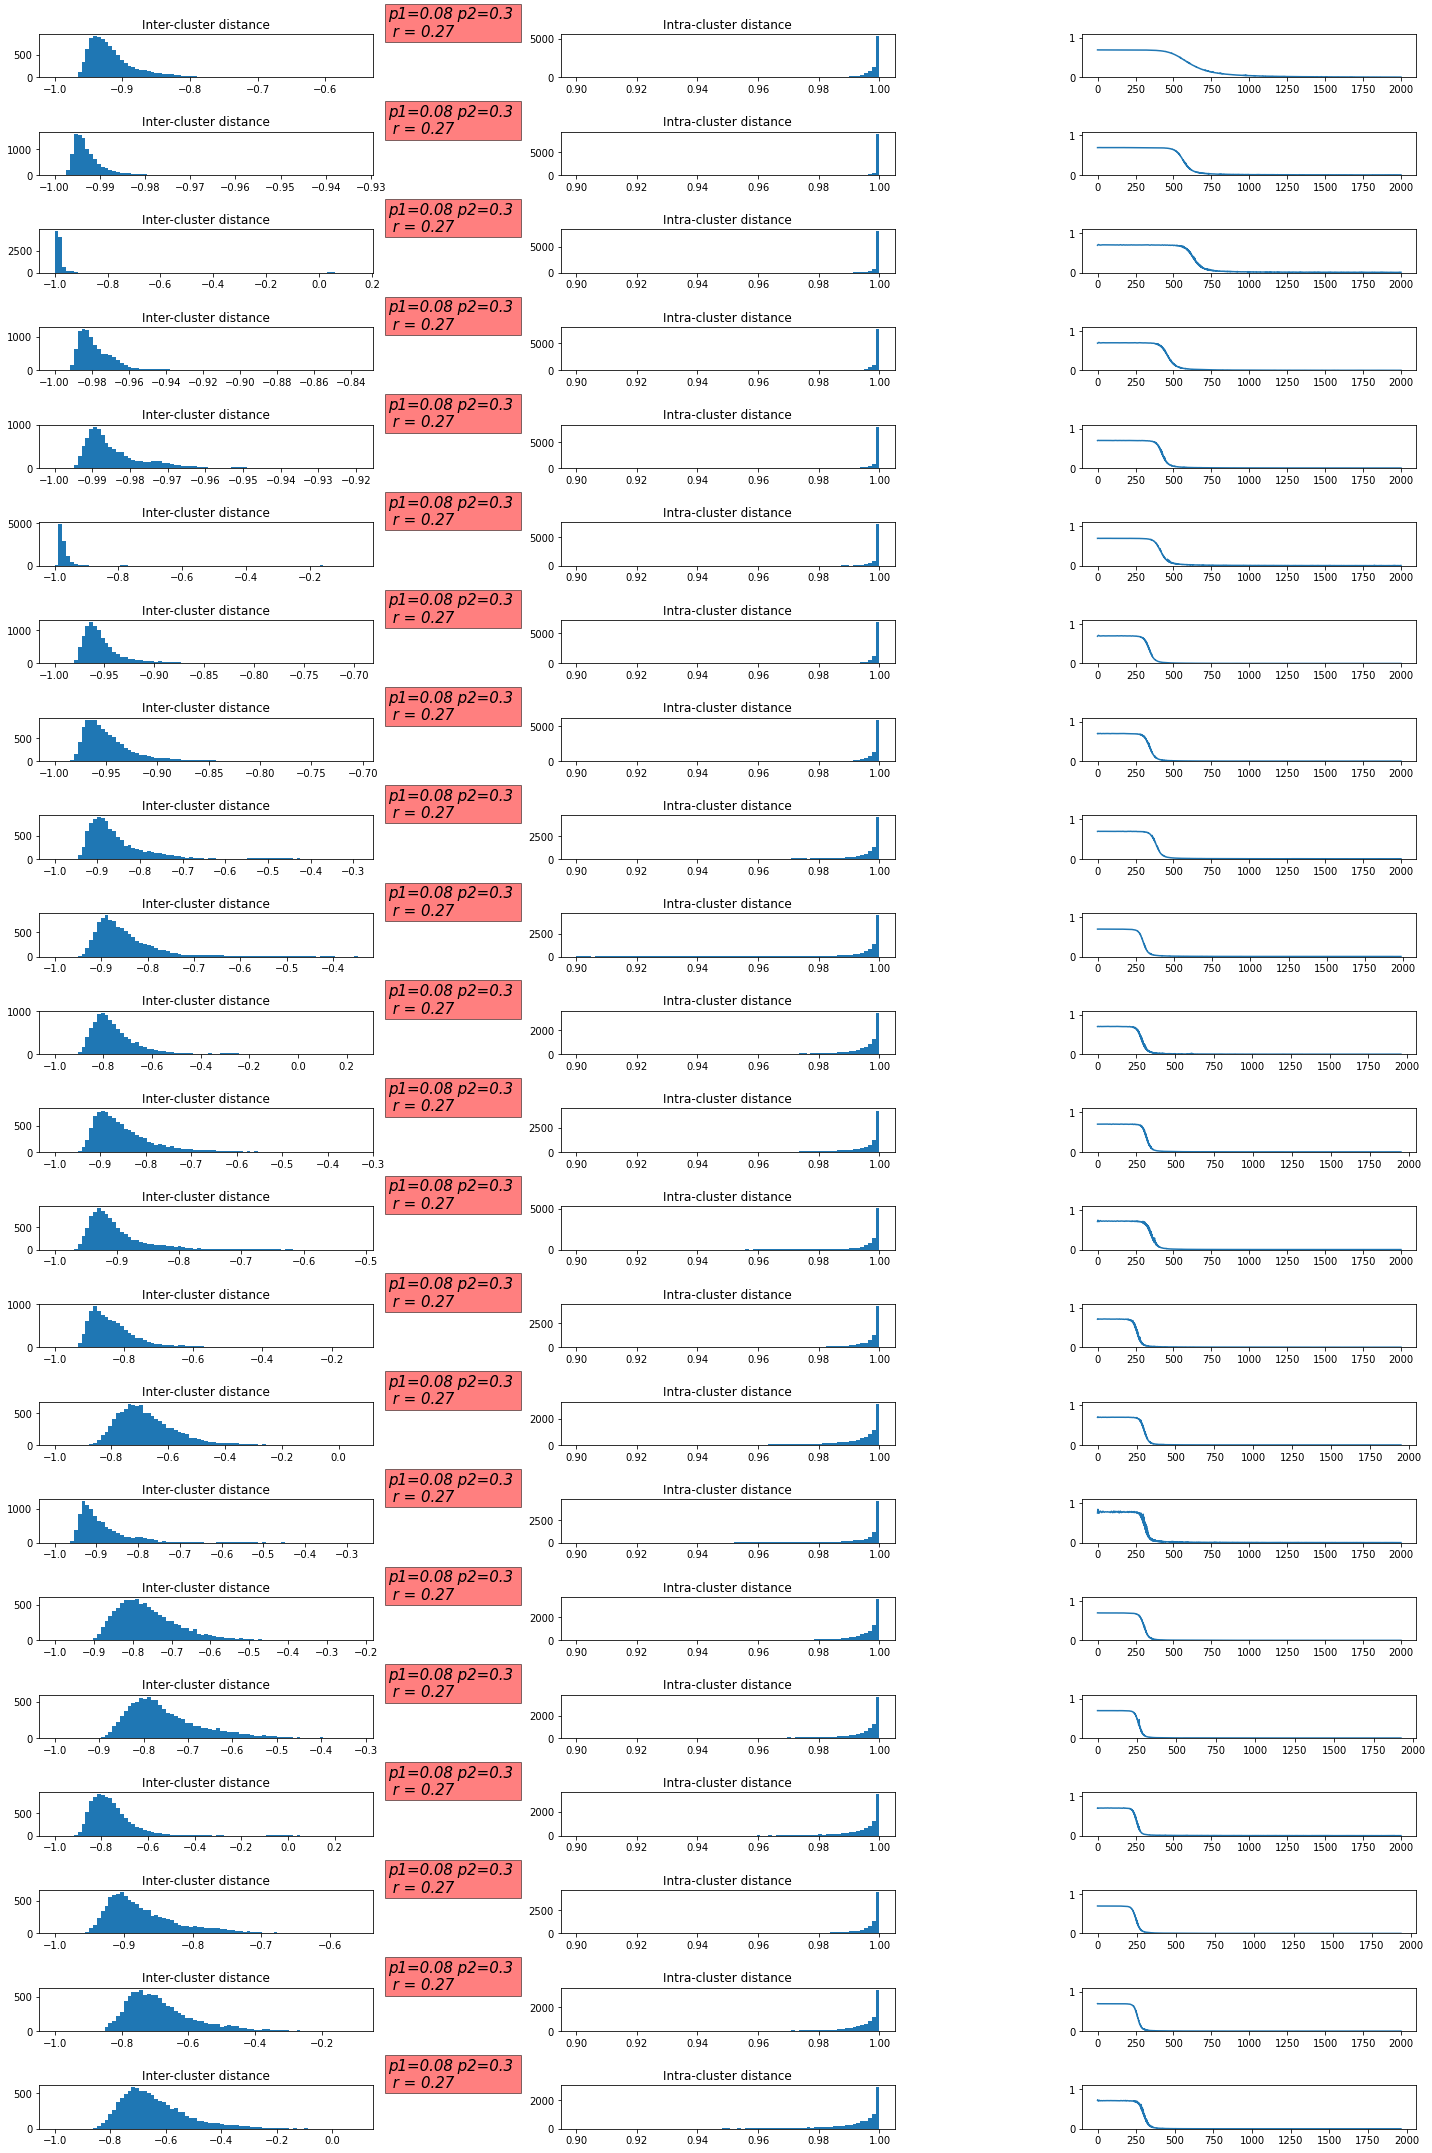

In [18]:
ord_list_embeddings = sorted(list_embeddings, key=lambda emb: emb.probabilities_ER[0] / emb.probabilities_ER[1])

fig, axs = plt.subplots(len(list_embeddings), 3, figsize=(20,30)) #,  sharex=True)
for i, emb in enumerate(ord_list_embeddings):
    
    p1 = emb.probabilities_ER[1]
    p2 = emb.probabilities_ER[0]
    r = round(p1 /p2 , 2)
    
    #fig.suptitle(f"p1={emb.probabilities_ER[0]} p2={emb.probabilities_ER[1]}")
    bins1 = np.linspace(-1, max(emb.inter_dists), 80)
    n,b,_ = axs[i][0].hist(emb.inter_dists, bins=bins1, label=f"Inter-classe distance")
    axs[i][0].set_title('Inter-cluster distance')#(loc="upper right")
    
    lsx = -1.0
    ldx = max(emb.inter_dists)
    axs[i][0].text(ldx + (ldx-lsx)/10, max(n), f"p1={round(p1,3)} p2={round(p2,3)} \n    r = {r}", style='italic', fontsize=15, 
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})
    
    bins2 = np.linspace(0.9, 1.0, 80)
    axs[i][1].hist(emb.intra_dists, bins=bins2, label=f"Intra-classeb distance")
    axs[i][1].set_title("Intra-cluster distance")#(loc="upper left")
    
    axs[i][2].plot(emb.test_loss_list)
    axs[i][2].axis(ymin=0,ymax=1.1)
    
plt.tight_layout()
plt.savefig('distances_embeddings.png')
plt.show()

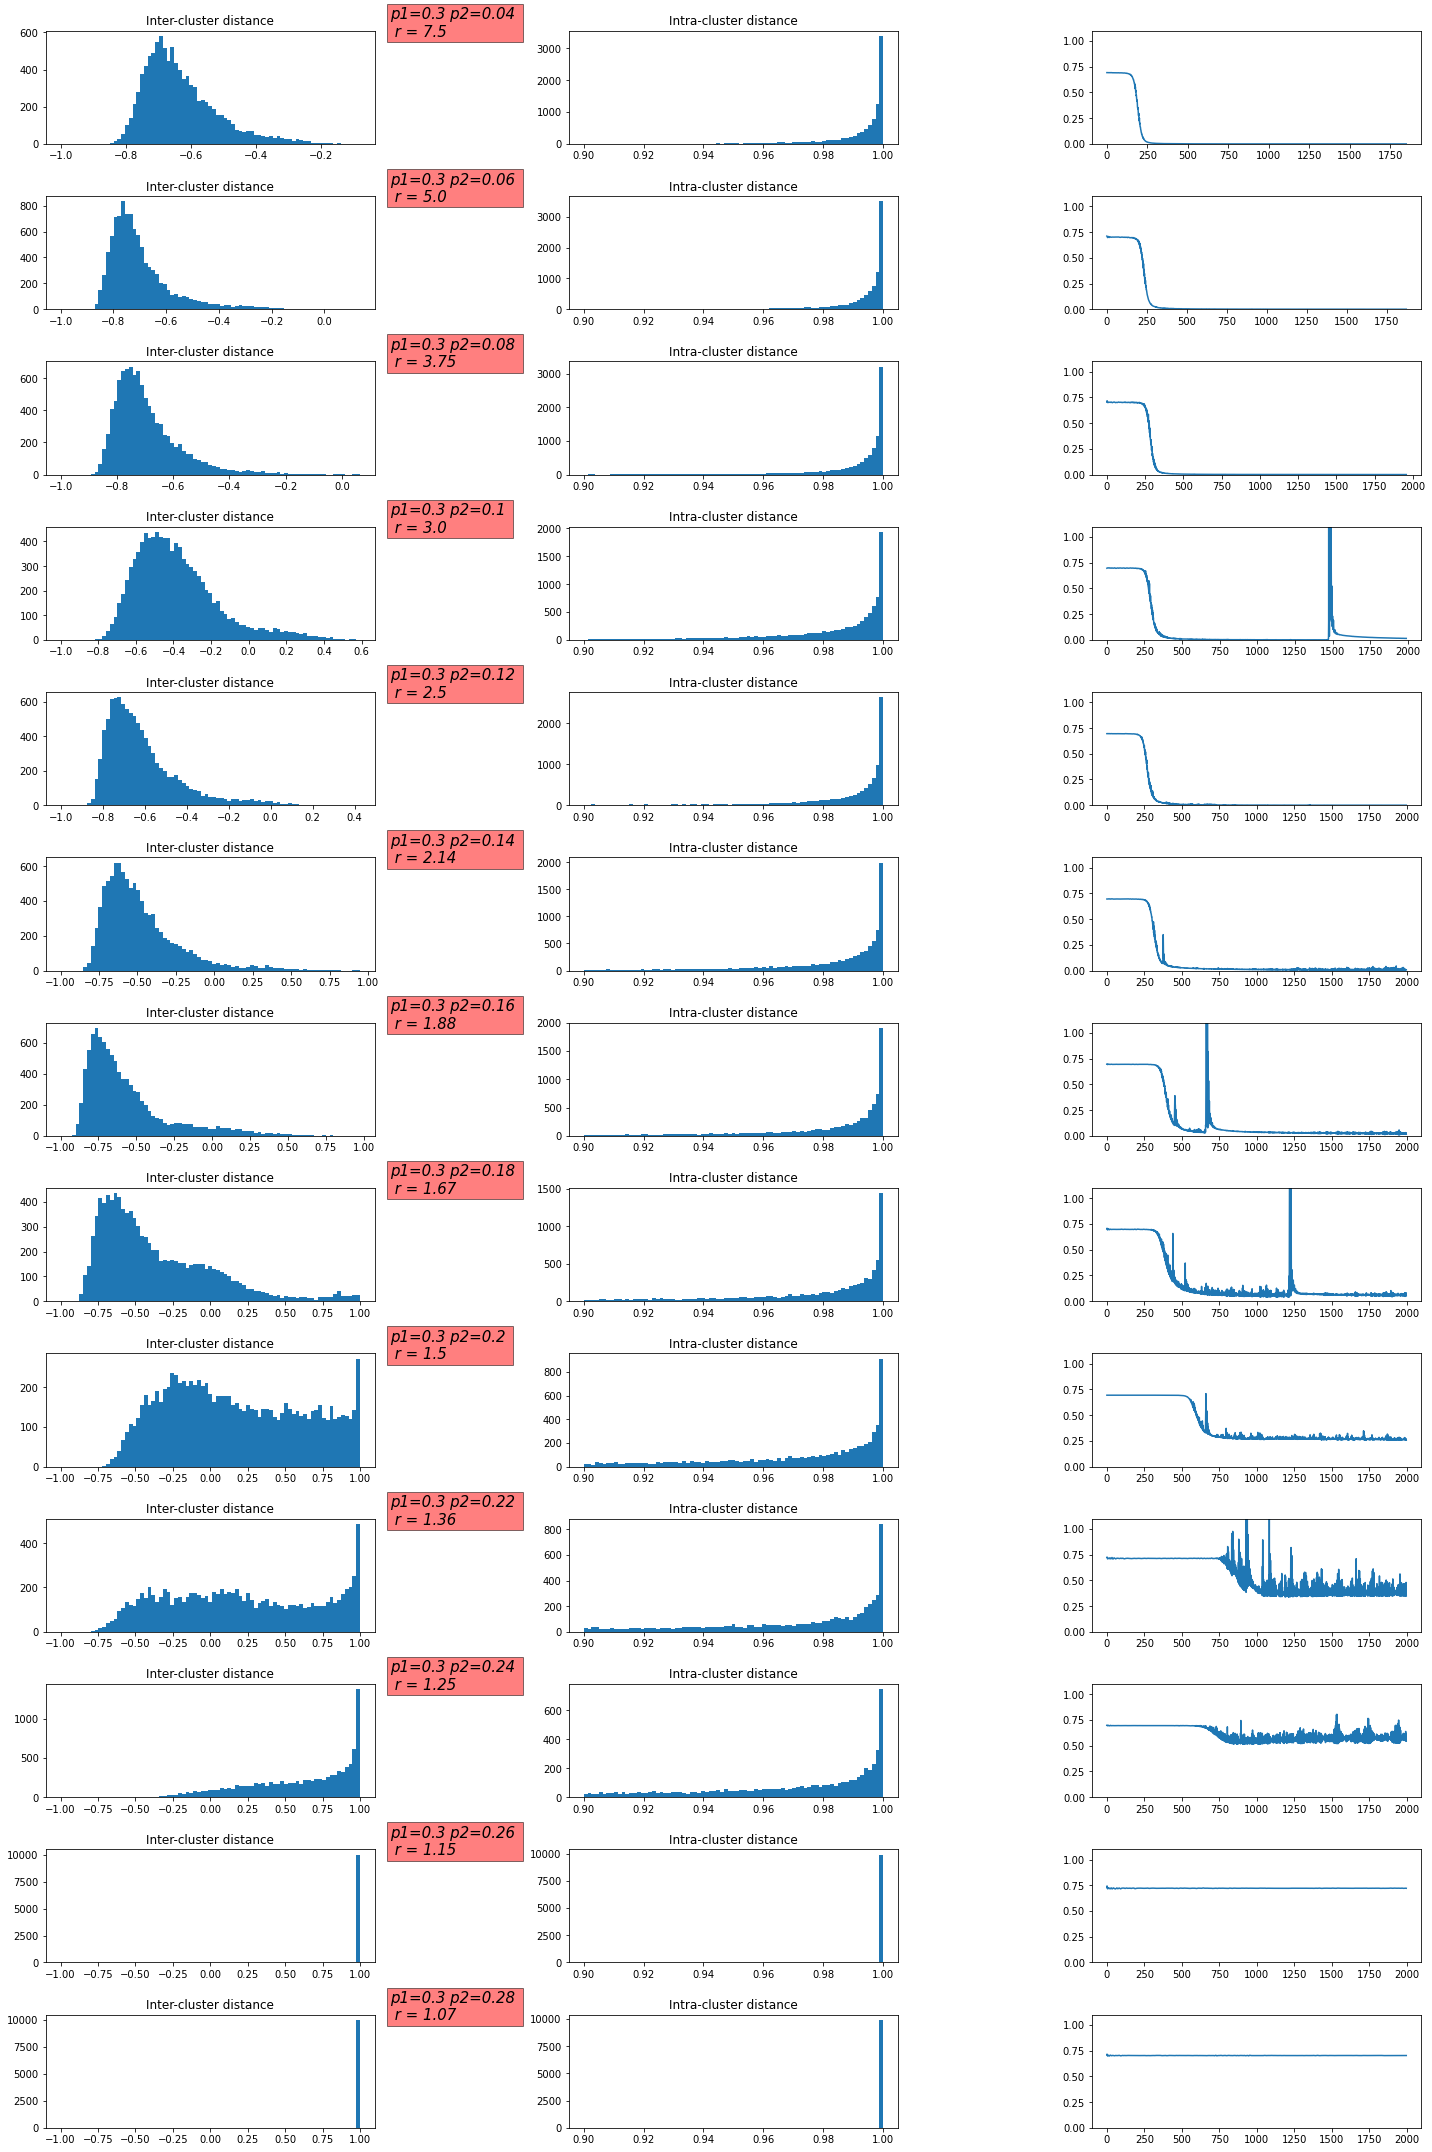

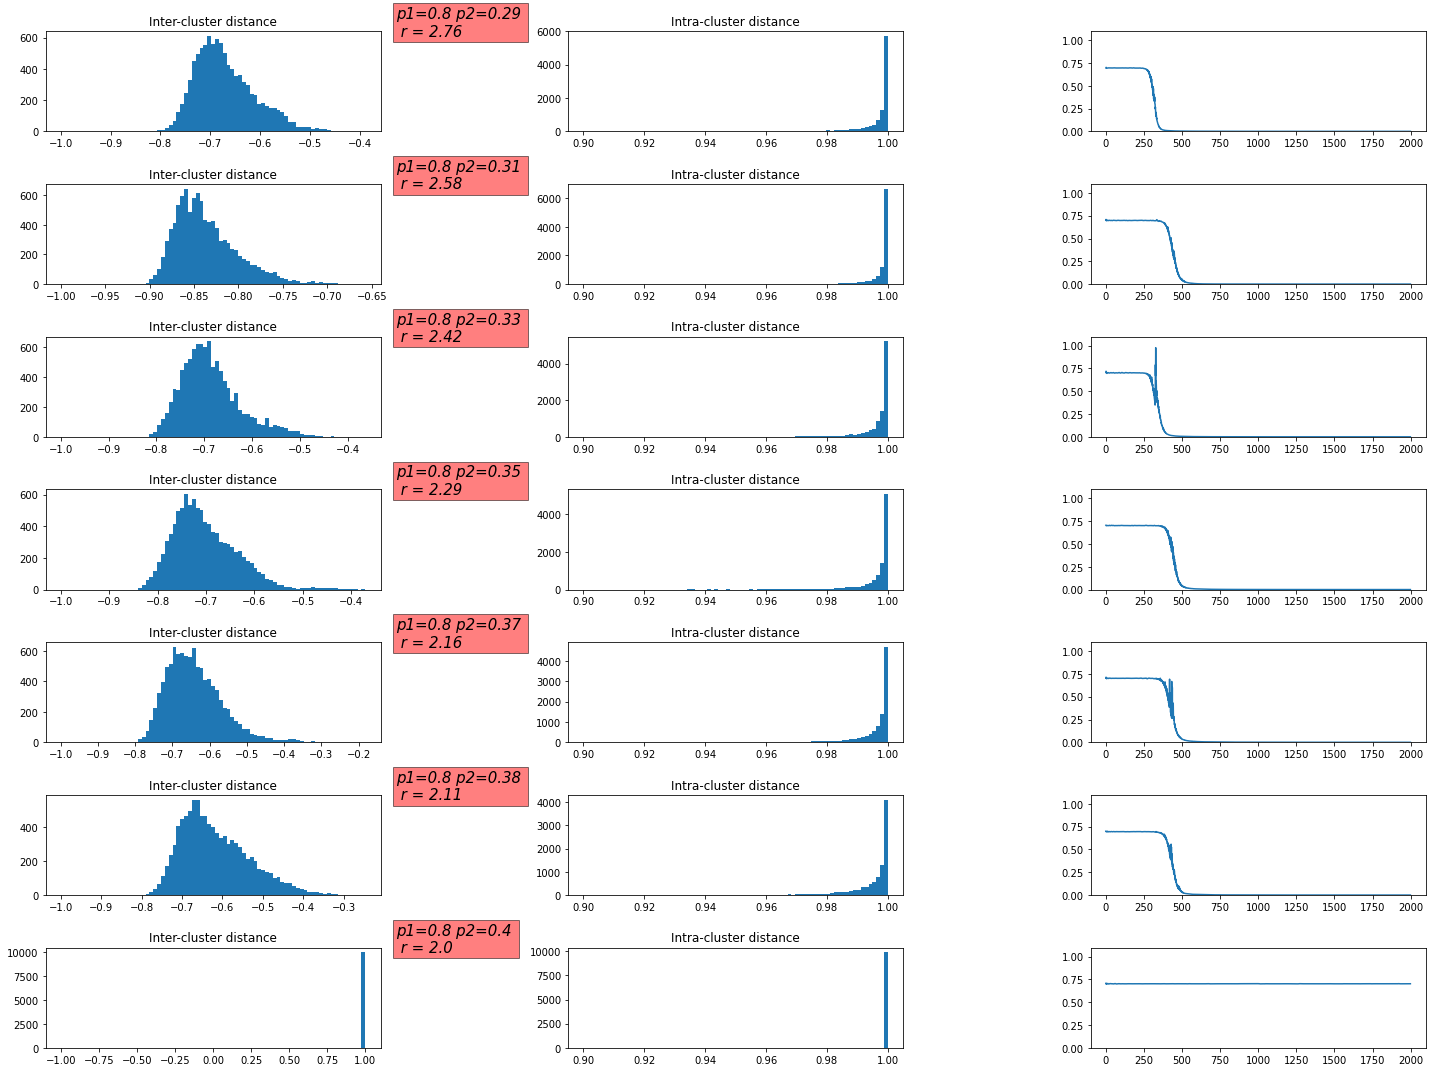

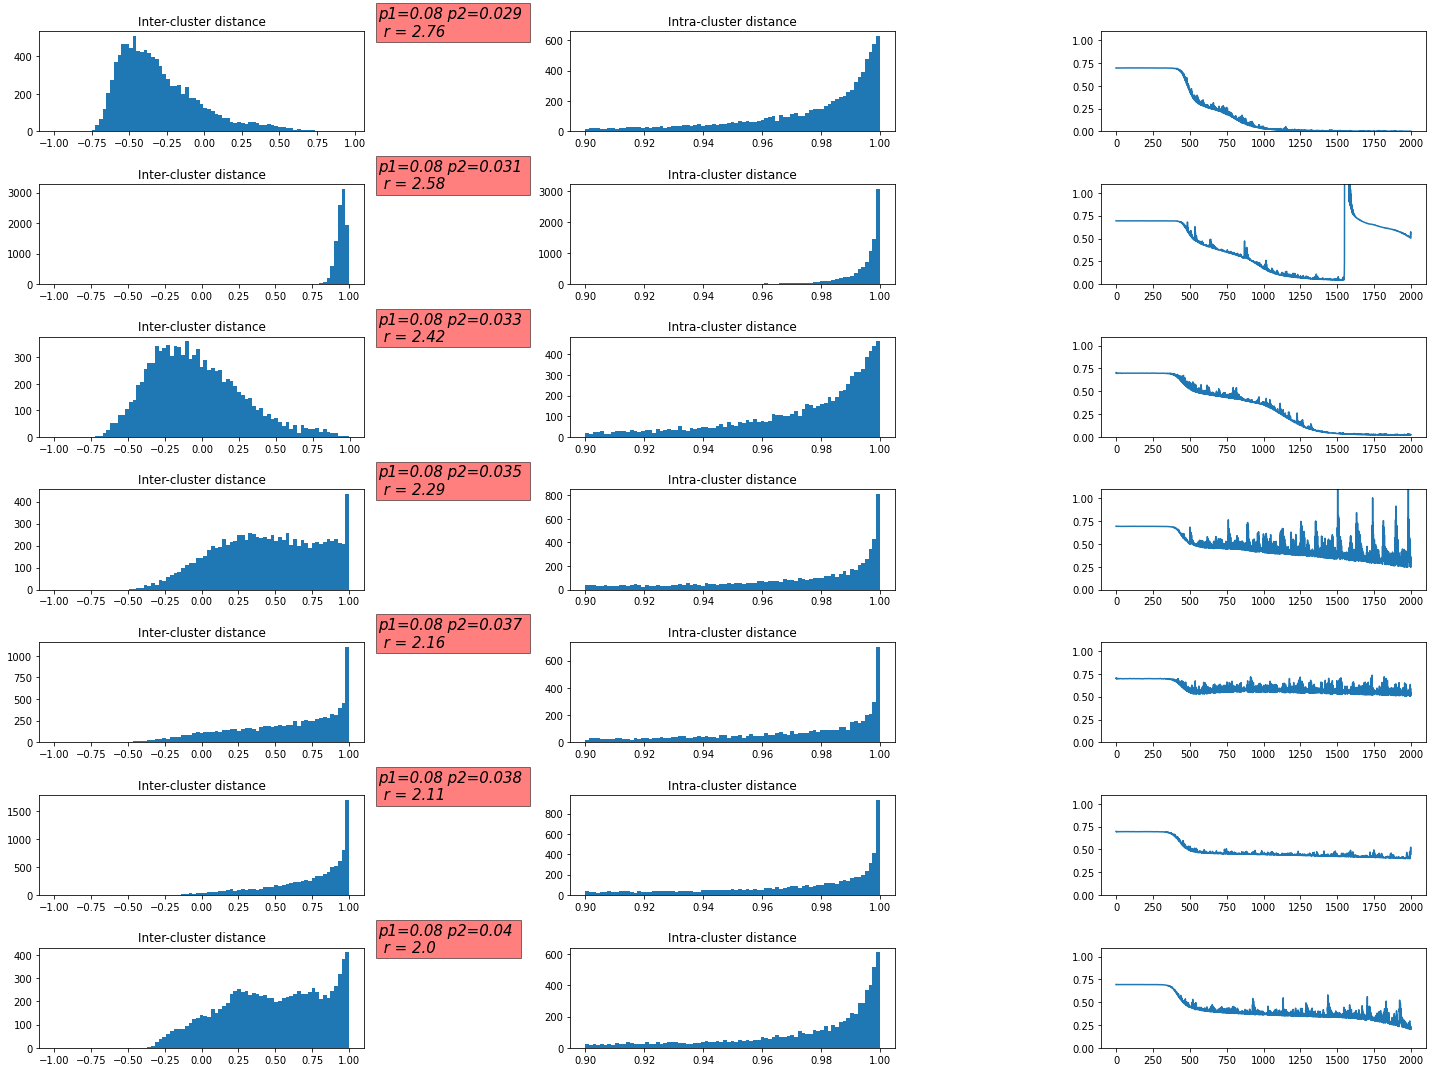

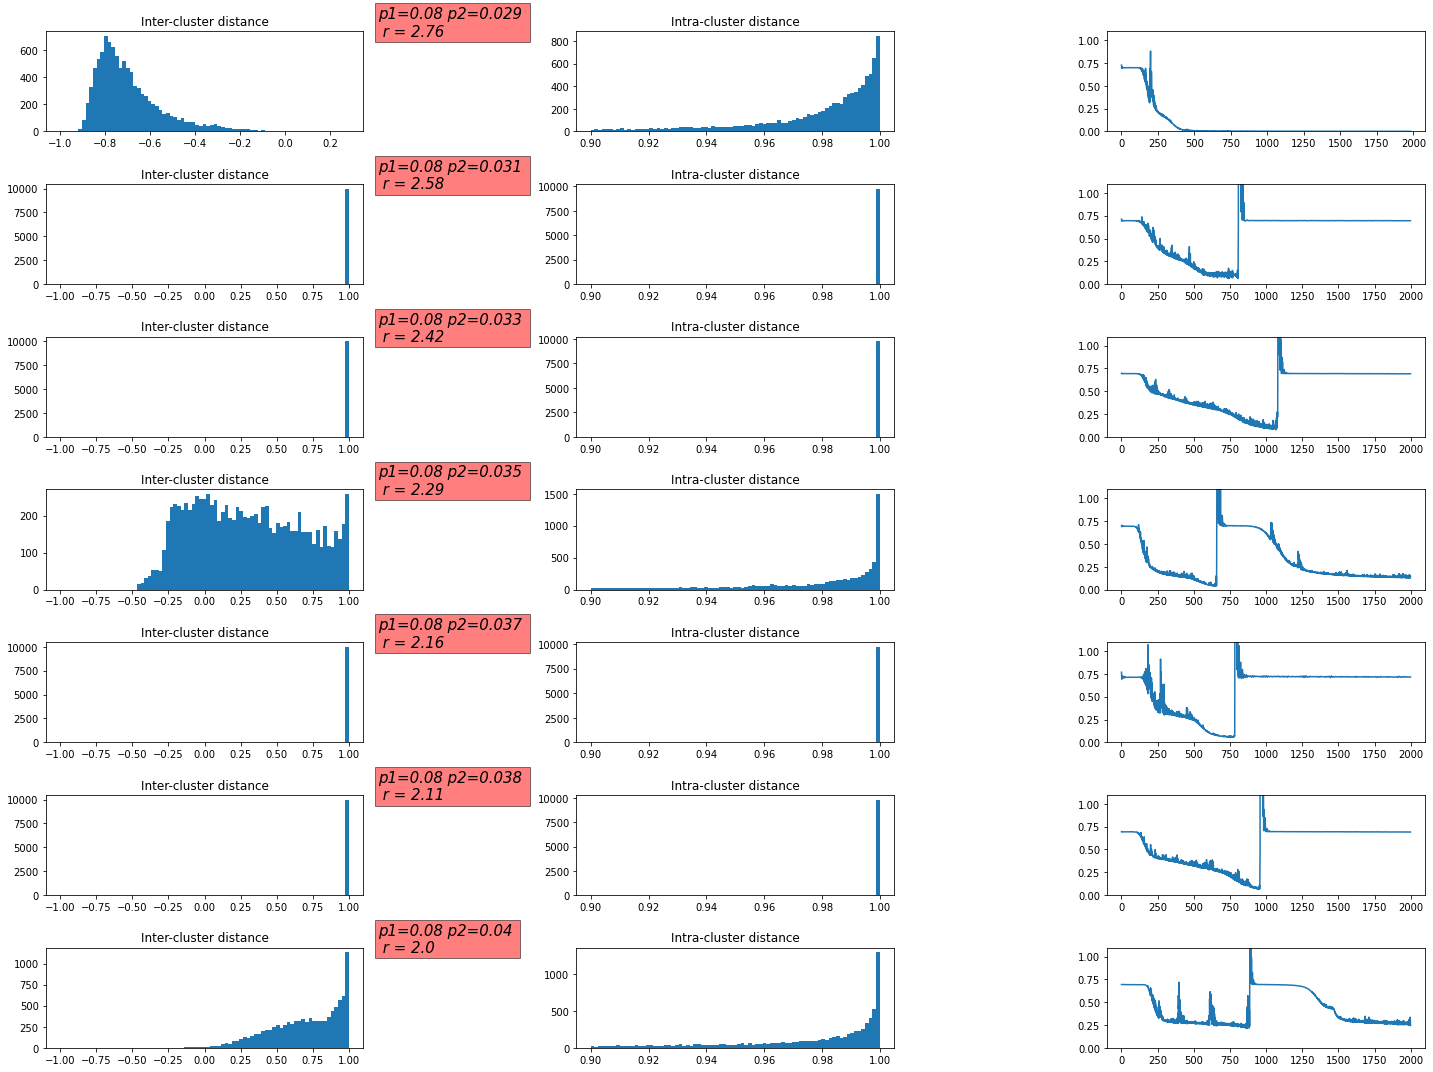

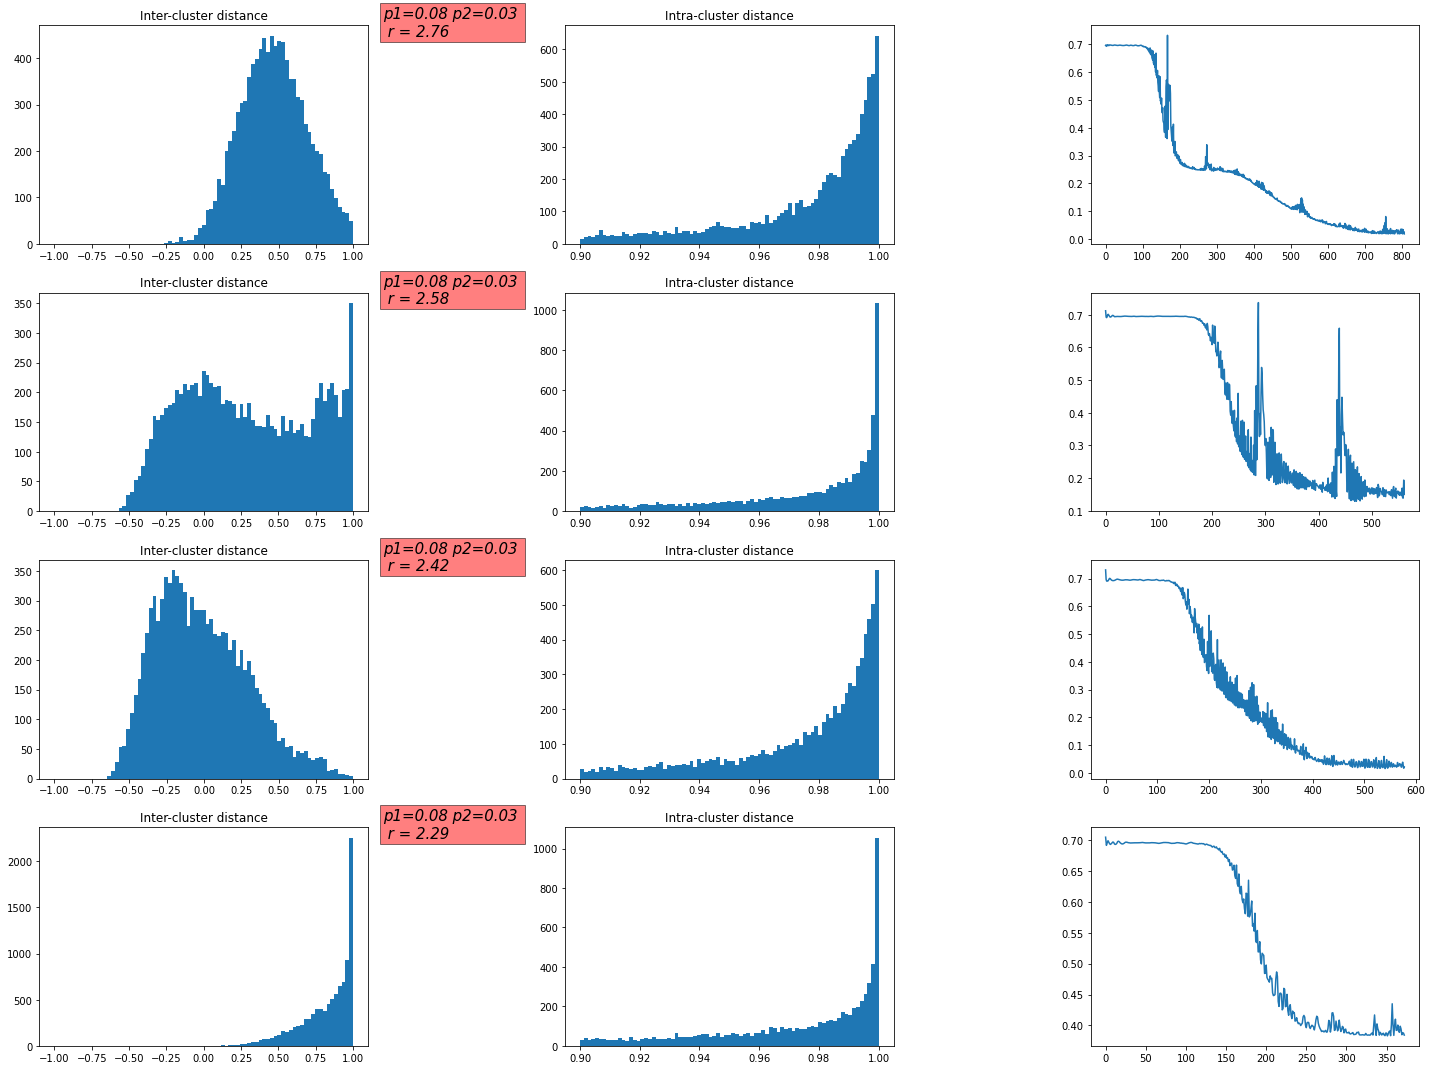

# Heatmap 

In [ ]:
values = np.array([(np.array(emb.inter_dists).mean(), (emb.probabilities_ER[0], emb.probabilities_ER[1]))  for emb in list_embeddings])
values#[:,1]

In [ ]:
mappa = np.zeros((len(lista_p1), len(lista_p2)))
mappa = np.array(lista_p1)[:,np.newaxis] , np.array(lista_p2)[np.newaxis, :]
mappa

In [ ]:
matrice = np.array([[(i,j) for j in lista_p1] for i in lista_p2])
tuple(matrice[0,0]) == values[0][1]
heatmap = np.zeros((len(lista_p1), len(lista_p2)))

In [ ]:
for i, row in enumerate(matrice):
    for j, col in enumerate(row):
        for k, n in enumerate(values[:,1]):
            if n == tuple(col):
                heatmap[i,j] = values[k,0]
                #print(n, col, values[k,0])
                break

In [ ]:
heatmap.dtype

In [ ]:
fig, ax1 = plt.subplots()
#ax1.pcolor(heatmap, cmap='autumn')
im = ax1.imshow(heatmap, cmap='autumn')
cbar = ax1.figure.colorbar(im, ax1, 'autumn')
cbar.ax.set_ylabel("Mean distance", rotation=-90, va="bottom")

ax1.set_xticks(np.arange(len(lista_p1)), labels=lista_p1)
ax1.set_yticks(np.arange(len(lista_p2)), labels=lista_p2)
plt.xlabel('p1', fontsize=16)
plt.ylabel('p2', fontsize=16)


    
"""
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.linspace(0.5, len(lista_p1)-0.5, num=len(lista_p1)))
ax2.set_xticklabels(lista_p1)
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(np.linspace(0.5, len(lista_p2)-0.5, num=len(lista_p2)))
ax2.set_yticklabels(lista_p2)
"""
#plt.imshow(heatmap, cmap='autumn') #, interpolation='nearest')
#ax1.set_yticklabels([])
#ax1.set_xticklabels([])
#ax1.set_xticks([])
#ax1.set_yticks([])
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
im, cbar = f_heatmap(heatmap, lista_p1, lista_p2, ax=ax, cmap="autumn", cbarlabel="Mean distance")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [ ]:
def f_heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    
    plt.xlabel('p1', fontsize=16)
    plt.ylabel('p2', fontsize=16)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()